In [42]:
import numpy as np
import networkx as nkx
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [13]:
np.floor(np.random.rand(10, 10)*10).astype('int')

array([[8, 8, 3, 6, 8, 0, 1, 7, 4, 3],
       [1, 1, 3, 7, 8, 0, 2, 0, 6, 7],
       [5, 2, 6, 0, 1, 8, 1, 8, 9, 0],
       [0, 1, 7, 6, 9, 6, 0, 5, 6, 9],
       [9, 0, 2, 1, 6, 9, 7, 6, 3, 6],
       [6, 6, 9, 6, 9, 0, 0, 4, 4, 0],
       [7, 0, 5, 1, 5, 1, 9, 4, 0, 8],
       [6, 6, 8, 6, 9, 1, 5, 4, 9, 5],
       [4, 4, 4, 3, 4, 8, 3, 8, 1, 9],
       [6, 1, 3, 5, 3, 9, 3, 0, 5, 0]])

In [80]:
with open('input_day15_stg.txt', 'rt') as f:
    input_raw=f.read().splitlines()
print(input_raw[0:10])

['1163751742', '1381373672', '2136511328', '3694931569', '7463417111', '1319128137', '1359912421', '3125421639', '1293138521', '2311944581']


In [131]:
with open('input_day15_prd.txt', 'rt') as f:
    input_raw=f.read().splitlines()
print(input_raw[0:10])

['3576219475874583191916312133474175459337114195988185136398151631965391991813219974121211251194786128', '1713881999231519357799114192443351147195293575386923868711388519361669464234397975938889146414199688', '2151922113728581598379349983928489926261239862882888968998791929828316718921297117449631496888879522', '3291722311299652548445221254456535112944431135116631433192483199481594768169444158222431199929579291', '1472287315918113113959972189351931626141472991992791413146153989481318998519171231313898962992319251', '8978798318873934543151823824117132228417869392811216547172919119998739911121199246294815175868992773', '4711149989992717728465321161611967173674239298593935117599173279267114155265393397571372124856718732', '9843245319692998612781837729915931371619886371128818266322121623171343132131239399743799827972585645', '7183211712173272827112268971459424836293613294388761928991542137194981939169315879277494581991465822', '23857219965788345792246514314117171983411397514291566372298888

In [132]:
input=[[int(x) for x in r] for r in input_raw]

In [133]:
ny=len(input)
nx=len(input[0])
offset=10**int(np.log10(nx)+1)

def xy2edge(x, y):
    return y*offset+x

def edge2x(e):
    return e%offset

def edge2y(e):
    return e//offset

nx, ny, offset

(100, 100, 1000)

In [134]:
G=nkx.DiGraph()
print(G)
for j in range(ny):
    for i in range(nx):
        G.add_node(xy2edge(i, j))
print(G)
for j in range(ny):
    for i in range(nx):
        for ox, oy in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
            if (0<=i+ox<nx)&(0<=j+oy<ny):
                G.add_edge(xy2edge(i, j), xy2edge(i+ox, j+oy), weight=input[j+oy][i+ox])
print(G)

DiGraph with 0 nodes and 0 edges
DiGraph with 10000 nodes and 0 edges
DiGraph with 10000 nodes and 39600 edges


In [135]:
G

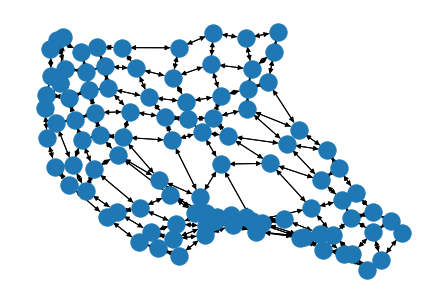

In [43]:
nkx.draw(G)

In [136]:
sp=nkx.shortest_path(G, 0, xy2edge(nx-1, ny-1), weight='weight', method='bellman-ford')
sp[0:10]

[0, 1000, 2000, 2001, 2002, 2003, 3003, 4003, 4004, 5004]

In [137]:
for j in range(ny):
    for i in range(nx):
        print('O' if j*offset+i in sp else '.', end='')
    print()    

O...................................................................................................
O...................................................................................................
OOOO................................................................................................
...O................................................................................................
...OO...............................................................................................
....O...............................................................................................
....O...............................................................................................
....O...............................................................................................
....OO..............................................................................................
.....O.....................................................................................

In [138]:
sum([input[edge2y(e)][edge2x(e)] for e in sp][1:])

487

In [139]:
#Part 2

In [145]:
# weights in range *1*-9, not 0-9

In [140]:
input55=np.concatenate([(np.concatenate([(np.array(input)-1+i)%9 for i in range(5)], axis=1)+j)%9 for j in range(5)])+1
input55

array([[3, 5, 7, ..., 5, 6, 3],
       [1, 7, 1, ..., 1, 3, 3],
       [2, 1, 5, ..., 9, 6, 6],
       ...,
       [1, 9, 5, ..., 4, 2, 3],
       [7, 4, 4, ..., 6, 1, 9],
       [9, 4, 4, ..., 3, 5, 1]])

In [141]:
ny=len(input55)
nx=len(input55[0])
offset=10**int(np.log10(nx)+1)

def xy2edge(x, y):
    return y*offset+x

def edge2x(e):
    return e%offset

def edge2y(e):
    return e//offset

nx, ny, offset

(500, 500, 1000)

In [142]:
G55=nkx.DiGraph()
print(G55)
for j in range(ny):
    for i in range(nx):
        G55.add_node(xy2edge(i, j))
print(G55)
for j in range(ny):
    for i in range(nx):
        for ox, oy in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
            if (0<=i+ox<nx)&(0<=j+oy<ny):
                G55.add_edge(xy2edge(i, j), xy2edge(i+ox, j+oy), weight=input55[j+oy][i+ox])
print(G55)

DiGraph with 0 nodes and 0 edges
DiGraph with 250000 nodes and 0 edges
DiGraph with 250000 nodes and 998000 edges


In [143]:
sp=nkx.shortest_path(G55, 0, xy2edge(nx-1, ny-1), weight='weight', method='bellman-ford')
sp[0:10]

[0, 1000, 2000, 2001, 2002, 2003, 3003, 4003, 4004, 5004]

In [144]:
sum([input55[edge2y(e)][edge2x(e)] for e in sp][1:])

2821